In [1]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel
from quetzal.io import excel
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from syspy.skims import skims
from rasterio import plot

SQLalchemy is not installed. No support for SQL output.


In [3]:
sm_msplit = stepmodel.read_zippedpickles(r'../../model/{scen}/modal_split'.format(scen=scenario))
sm_assign = stepmodel.read_zippedpickles(r'../../model/{scen}/assignment'.format(scen=scenario))

zone_to_transit: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.47it/s]


In [4]:
var = excel.read_var(file='../../inputs/parameters.xlsx', scenario=scenario)

## Sorties modèle

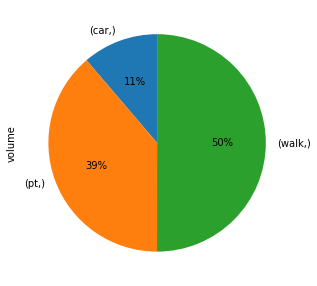

In [5]:
#Modal split (Number of trips)

s = sm_msplit.los.groupby('route_types')['volume'].sum()
plot_est = s.plot(
    kind='pie', 
    autopct='%1.0f%%',
    shadow=False,
    startangle=90, figsize=[5, 5])
plot_est.set_aspect('equal')

In [7]:
#Modal split (pass.km)
#dist. euclideana
#sm_assign.links['vol.time']

In [8]:
#Average daily time

sm_msplit.los['vol.time']=sm_msplit.los['time']*sm_msplit.los['volume']
ADT = sm_msplit.los['vol.time'].sum()/(60*sm_msplit.los['volume'].sum()) #minutes
ADT

26.465336947239916

In [9]:
#Km d'offre par mode

print(sm_msplit.links.groupby('route_type')['road_length'].sum())

route_type
bajaj    834525.175938
Name: road_length, dtype: float64


In [10]:
#Veh.km par mode

sm_assign.lines

,trip_id,direction_id,line,route_id,departure,direction,destination,geometry
0,0,1,0,0,seido,eshet grocery,university,"LINESTRING (811339.957 1064005.306, 811356.936..."
1,0_bis,0,0,0,seido,eshet grocery,university,"LINESTRING (811502.112 1062605.703, 811505.421..."
2,1,1,1,1,seido,jelaba,university,"LINESTRING (811339.957 1064005.306, 811356.936..."
3,10,1,10,10,seido,gende kore,karamara,"LINESTRING (813458.243 1060702.064, 813452.583..."
4,100,1,100,100,dipo,megala dildi,taiwan,"LINESTRING (814714.694 1061632.178, 814703.971..."
...,...,...,...,...,...,...,...,...
285,98,1,98,98,dipo,legehar,police meret,"LINESTRING (815134.356 1062844.514, 815135.166..."
286,98_bis,0,98,98,dipo,legehar,police meret,"LINESTRING (812980.946 1061702.262, 812991.756..."
287,99,1,99,99,dipo,legehar,finance,"LINESTRING (814192.955 1062475.821, 814207.486..."
288,99_bis,0,99,99,dipo,legehar,finance,"LINESTRING (812980.946 1061702.262, 812991.756..."


In [11]:
sm_assign.links

,a,b,link_sequence,direction_id,line,trip_id,route_id,road_a,road_b,road_node_list,...,road_length,geometry,route_type,headway,length,road_time,time,pt,boardings,alightings
link_0,university,eshet grocery,0,0,0,0,0,road_node_797,road_node_1840,"[road_node_797, road_node_1542, road_node_4938...",...,998.098963,"LINESTRING (811339.957 1064005.306, 811356.936...",bajaj,300.0,998.098963,49.904948,49.904948,109.841503,109.841503,2.833468
link_1,eshet grocery,seido,1,0,0,0,0,road_node_1840,road_node_1665,"[road_node_1840, road_node_1490, road_node_455...",...,788.665218,"LINESTRING (811757.899 1063351.698, 811713.919...",bajaj,300.0,788.665218,39.433261,39.433261,126.173024,19.164989,126.173024
link_2,seido,eshet grocery,0,0,0_bis,0_bis,0_bis,road_node_1665,road_node_1840,"[road_node_1665, road_node_5014, road_node_219...",...,788.665218,"LINESTRING (811502.112 1062605.703, 811505.421...",bajaj,300.0,788.665218,39.433261,39.433261,99.886588,99.886588,61.499487
link_3,eshet grocery,university,1,0,0_bis,0_bis,0_bis,road_node_1840,road_node_797,"[road_node_1840, road_node_3933, road_node_110...",...,995.328246,"LINESTRING (811757.899 1063351.698, 811761.929...",bajaj,300.0,995.328246,49.766412,49.766412,39.126011,0.738909,39.126011
link_4,university,eshet grocery,0,0,1,1,1,road_node_797,road_node_1840,"[road_node_797, road_node_1542, road_node_4938...",...,998.098963,"LINESTRING (811339.957 1064005.306, 811356.936...",bajaj,300.0,998.098963,49.904948,49.904948,432.230412,432.230412,8.086767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
link_1523,sabian agip,bridge,2,0,9_bis,9_bis,9_bis,road_node_822,road_node_4668,"[road_node_822, road_node_4071, road_node_4096...",...,340.489477,"LINESTRING (812218.296 1062355.854, 812330.191...",bajaj,300.0,340.489477,17.024474,17.024474,41.904451,3.427280,NaN
link_1524,bridge,dipo,3,0,9_bis,9_bis,9_bis,road_node_4668,road_node_2816,"[road_node_4668, road_node_2543, road_node_367...",...,715.037442,"LINESTRING (812535.301 1062231.921, 812568.582...",bajaj,300.0,715.037442,35.751872,35.751872,46.511158,4.606707,0.291074
link_1525,dipo,sholla hotel,4,0,9_bis,9_bis,9_bis,road_node_2816,road_node_1282,"[road_node_2816, road_node_2825, road_node_170...",...,364.975454,"LINESTRING (812980.946 1061702.262, 812991.756...",bajaj,300.0,364.975454,18.248773,18.248773,55.892791,9.672707,0.736907
link_1526,sholla hotel,karamara,5,0,9_bis,9_bis,9_bis,road_node_1282,road_node_2481,"[road_node_1282, road_node_1052, road_node_420...",...,928.906495,"LINESTRING (813176.167 1061416.487, 813156.024...",bajaj,300.0,928.906495,46.445325,46.445325,56.826772,1.670889,18.665741
